# 🏏 IPL Data Analysis Project

This project explores IPL (Indian Premier League) data using Python libraries like Pandas, Matplotlib, and Seaborn.

We will:
- Explore matches and deliveries data
- Visualize team performances
- Identify top batsmen and bowlers
- Analyze toss decisions and match results

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [42]:
# Load matches and deliveries datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Quick preview
matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


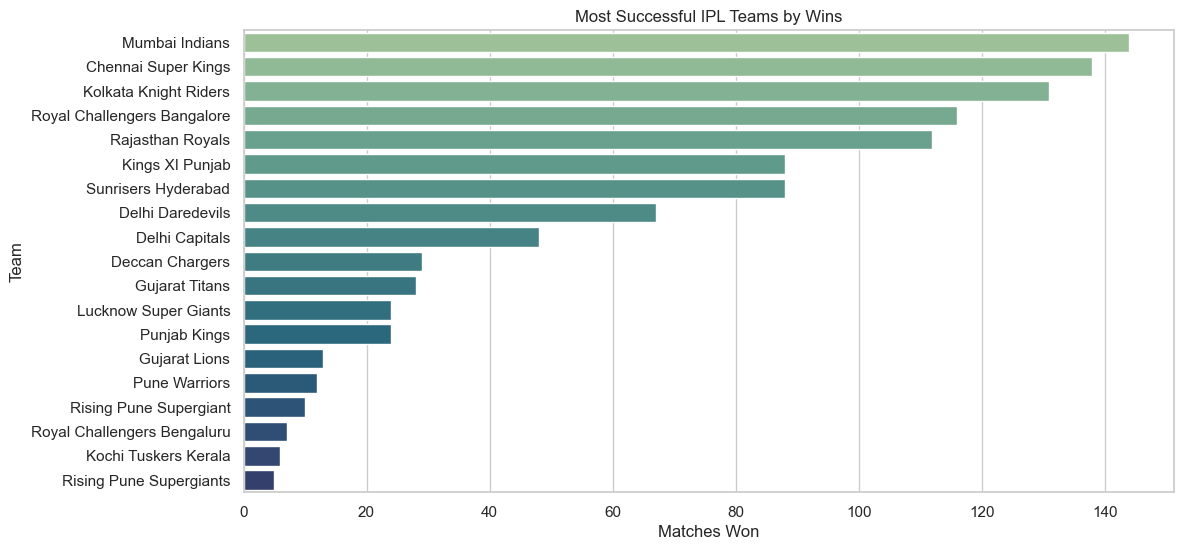

In [66]:
# Count of matches won by each team
team_wins = matches["winner"].value_counts()

# Bar plot
sns.barplot(x=team_wins.values, y=team_wins.index,hue=team_wins.index,legend=False ,palette="crest")
plt.xlabel("Matches Won")
plt.ylabel("Team")
plt.title("Most Successful IPL Teams by Wins")
plt.show()


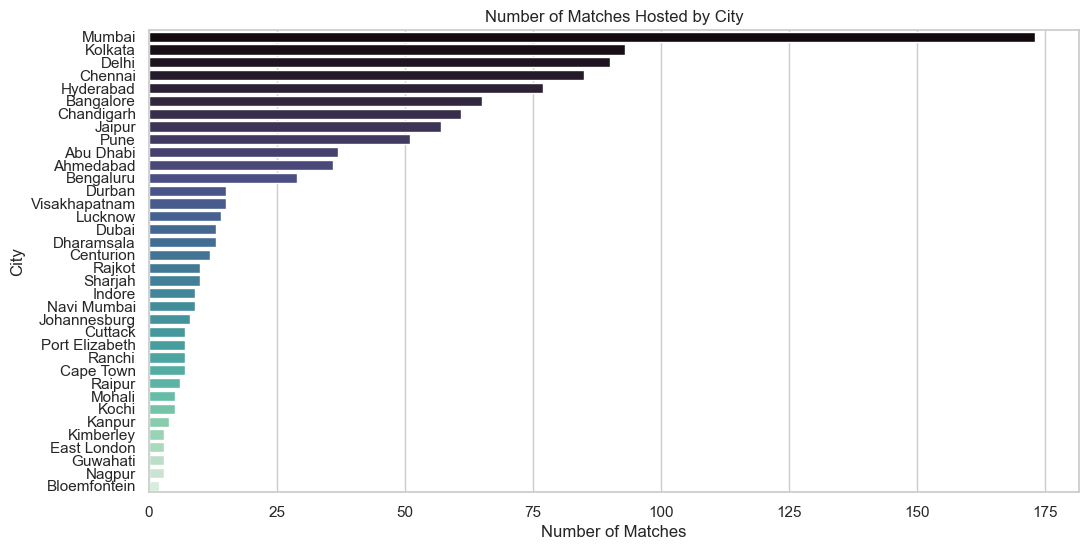

In [67]:
# Count matches per city
city_matches = matches["city"].value_counts()

# Bar plot
sns.barplot(x=city_matches.values, y=city_matches.index, palette="mako",hue=city_matches.index,legend=False)
plt.xlabel("Number of Matches")
plt.ylabel("City")
plt.title("Number of Matches Hosted by City")
plt.show()


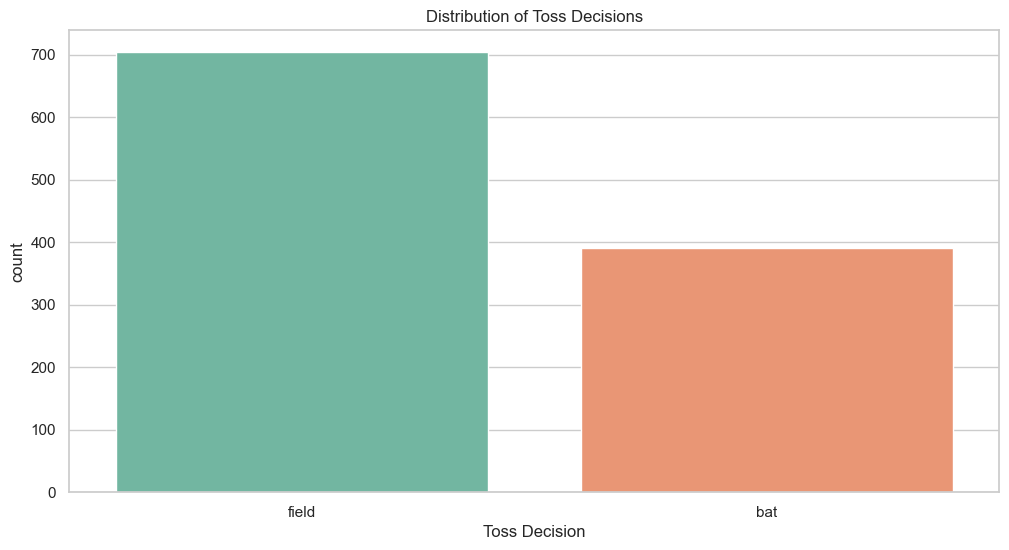

In [73]:
# Count plot: toss decisions
sns.countplot(x="toss_decision", data=matches, palette="Set2",hue="toss_decision",legend=False)
plt.xlabel("Toss Decision")
plt.title("Distribution of Toss Decisions")
plt.show()


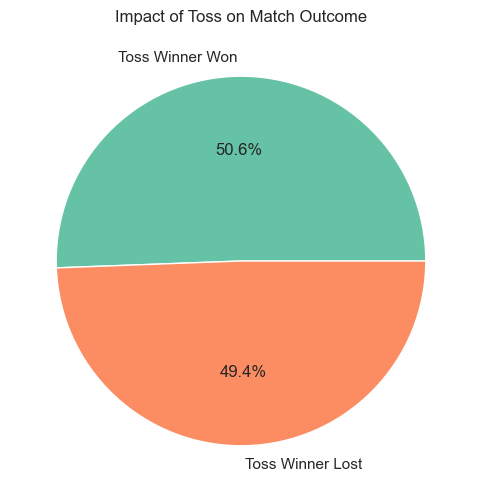

In [59]:
# How often toss winner also won match
toss_winner_match_winner = (matches["toss_winner"] == matches["winner"]).value_counts()

# Pie chart
plt.pie(toss_winner_match_winner, labels=["Toss Winner Won", "Toss Winner Lost"], autopct="%1.1f%%", colors=["#66c2a5","#fc8d62"])
plt.title("Impact of Toss on Match Outcome")
plt.show()


C:\Users\manis\AppData\Local\Temp\ipykernel_2852\1394925152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="viridis")


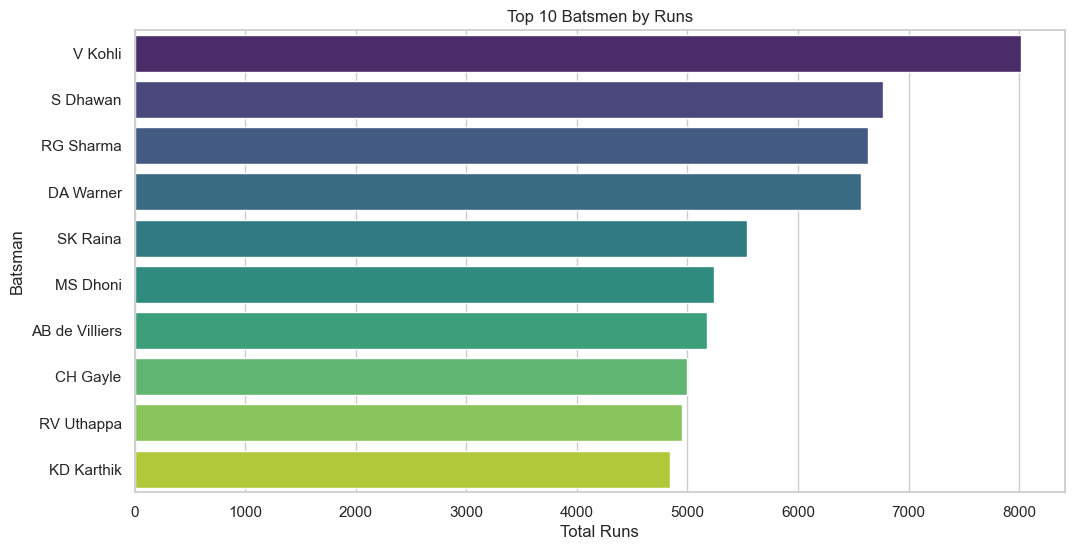

In [ ]:
# Total runs by batsman
top_batsmen = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

# Bar plot
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="viridis",hue=top_batsmen.index,legend=False)
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 10 Batsmen by Runs")
plt.show()


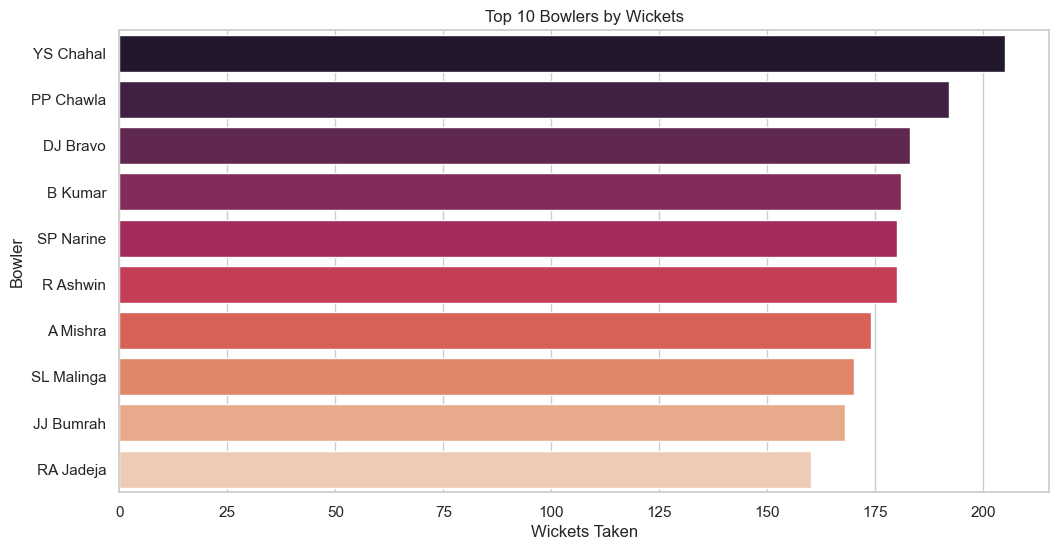

In [69]:
# Consider only genuine dismissals
wicket_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
wickets = deliveries[deliveries["dismissal_kind"].isin(wicket_kinds)]

top_bowlers = wickets.groupby("bowler").size().sort_values(ascending=False).head(10)

# Bar plot
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="rocket",hue=top_bowlers.index,legend=False)
plt.xlabel("Wickets Taken")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers by Wickets")
plt.show()


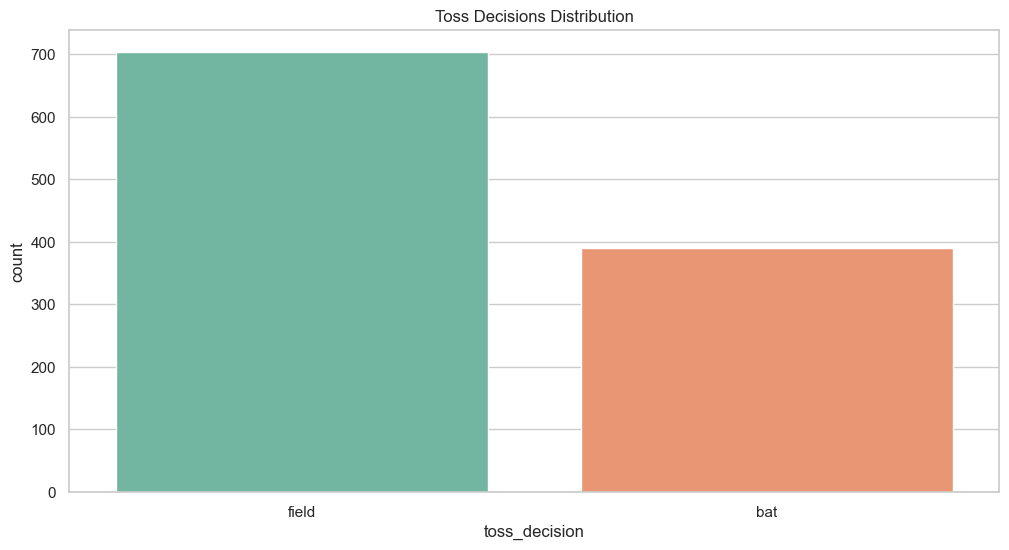

In [70]:
# Count plot: Toss Decisions
sns.countplot(x="toss_decision", data=matches, palette="Set2",hue="toss_decision",legend=False)
plt.title("Toss Decisions Distribution")
plt.show()


In [71]:
# 7. Matches per Season
matches_per_season = matches["season"].value_counts().sort_index()
matches_per_season


season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64

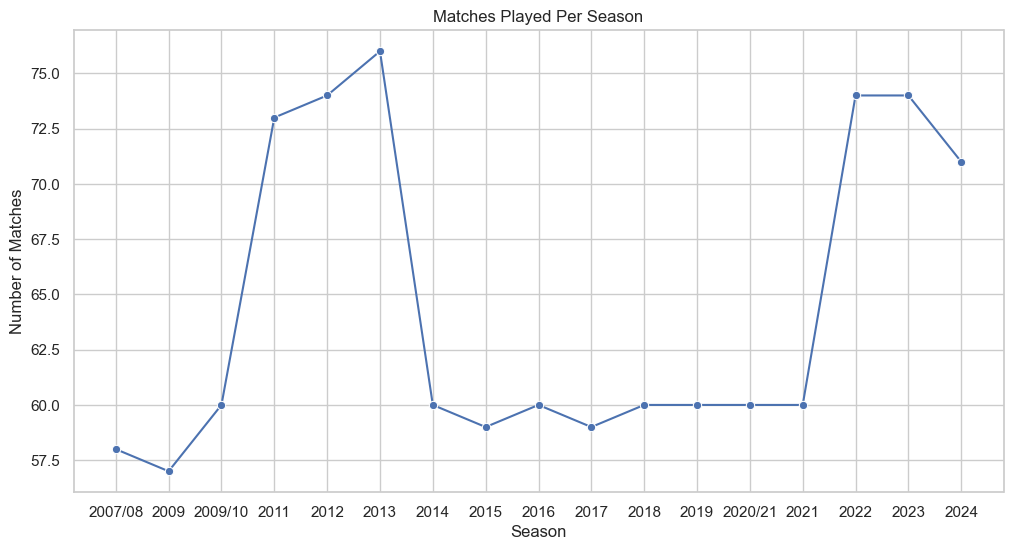

In [55]:
# Line chart: Matches per Season
sns.lineplot(x=matches_per_season.index, y=matches_per_season.values, marker="o")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.title("Matches Played Per Season")
plt.show()
